In [1]:
import tensorflow as tf
import numpy as np
from sklearn.cross_validation import train_test_split
from PIL import Image
from matplotlib.pyplot import imshow
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, Conv2D, MaxPooling2D
from keras.utils import np_utils

C:\Users\Abdul\Anaconda3\envs\dlnd-tf-lab\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
# import data
data = np.genfromtxt('train.csv', delimiter=',', skip_header = 1)
print(data.shape)

(42000, 785)


In [3]:
# train, test, validation split
Y = data[:,0]
X = data[:,1:]

# normalize independant variables
X = X/255

# reshaping to get image structure
X_reshaped = X.reshape((42000,28,28,1))
print(X_reshaped.shape)

# one hot label encoding
Y_encode = np.eye((np.unique(Y)).size)[Y.astype(int)]

x_train, x_test, y_train, y_test = train_test_split(X_reshaped, Y_encode, test_size = 0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.5)

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(42000, 28, 28, 1)
(29400, 28, 28, 1)
(6300, 28, 28, 1)
(6300, 28, 28, 1)
(29400, 10)
(6300, 10)
(6300, 10)


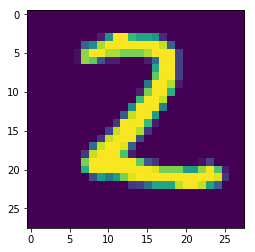

In [4]:
# test X reshape
%matplotlib inline
test = (X[101,:]).reshape(28, 28)
im = Image.fromarray(test)
imshow(test)

In [5]:
# test encoding
print(Y[1])
print(Y_encode[1])

0.0
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [6]:
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.1
set_session(tf.Session(config=config))

In [7]:
conv_net = Sequential()

# convolution layer 1
conv_net.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
conv_net.add(MaxPooling2D(pool_size=(3,3)))
conv_net.add(Dropout(0.5))

print(conv_net.output.shape)

# convolution layer 2
conv_net.add(Conv2D(64, (3, 3), activation='relu'))
conv_net.add(MaxPooling2D(pool_size=(3,3)))
conv_net.add(Dropout(0.5))

print(conv_net.output.shape)

# fully connected
conv_net.add(Flatten())
conv_net.add(Dense(128, activation='relu'))
conv_net.add(Dropout(0.5))
conv_net.add(Dense(10, activation='softmax'))

conv_net.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

(?, 8, 8, 32)
(?, 2, 2, 64)


In [8]:
conv_net.fit(x_train, y_train,batch_size=32, epochs=10, verbose=1)

Epoch 1/10
29400/29400 [==============================] - 12s - loss: 0.1400 - acc: 0.9498       

In [9]:
score = conv_net.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (conv_net.metrics_names[1], score[1]*100))

acc: 99.62%


In [10]:
score = conv_net.evaluate(x_val, y_val, verbose=0)
print("%s: %.2f%%" % (conv_net.metrics_names[1], score[1]*100))

acc: 99.72%


In [44]:
sub_data = np.genfromtxt('test.csv', delimiter=',', skip_header = 1)
print(sub_data.shape)

(28000, 784)


In [45]:
sub_data = sub_data/255
sub_data_reshaped = sub_data.reshape((28000,28,28,1))

In [47]:
predictions = conv_net.predict(sub_data_reshaped, verbose=1)

28000/28000 [==============================] - 5s      

In [48]:
print(predictions.shape)

(28000, 10)


In [55]:
final = np.argmax(predictions, axis=1)
print(final.shape)

(28000,)


In [60]:
np.savetxt(X = final, fname='predictions.csv',delimiter=',', newline='\n', header='Label')

In [61]:
print(final.dtype)

int64
